In [1]:
theta = 0.81
c1 = 0.72
c2 = 0.25
d1 = 1 - c1
d2 = 1 - c2

In [2]:
def first(a, b):
    return a / (a + b)

def second(a, b):
    return a * (a + 1) / ((a + b + 1) * (a + b))

def third(a, b):
    return (a * (a+1) * (a +2)) / ((a+b)*(a+b+1)*(a+b+2))

In [3]:
def solve(first, second):
    tau =  (second - first)/(first**2 - second)
    a = first * tau
    b = tau - a
    return a, b

In [23]:
iterations = 10000
initial_M1 = first(1, 1)
initial_M2 = second(1, 1)
initial_M3 = third(1, 1)
M1 = [initial_M1] * iterations
M2 = [initial_M2] * iterations
M3 = [initial_M3] * iterations

In [24]:
import math

In [25]:
import random

In [26]:
def estimate_third(mu1, mu2):
    left = (mu2**2 - (mu1**2)*mu2) / mu1
    right = (((1-mu1)**2)*mu2 - mu2**2) / (1-mu1)
    to_raw = 3*mu1*(mu2+mu1**2)-2*(mu1**3)
    left += to_raw
    right += to_raw
    #return (left+right)/2
    #return random.uniform(left, right)
    return (left+right)/2
    #coef = 1 / (i+1)**0.5
    #return coef * left + (1 - coef)* right

In [27]:
true_p = theta * c1 + (1 - theta) * c2
for i in range(1, iterations):
    r = random.uniform(0, 1)
    a, b = solve(M1[i-1], M2[i-1])
    M3 = third(a, b)
    if(r < true_p):
        M1[i] = (c1*M2[i-1]+c2*M1[i-1]-c2*M2[i-1])/(c1*M1[i-1]+c2*(1-M1[i-1]))
        #M2[i] = (c1*M3[i-1]+c2*M2[i-1]-c2*M3[i-1])/(c1*M1[i-1]+c2*(1-M1[i-1]))
        #M3[i] = estimate_third(M1[i], M2[i]-M1[i]**2)
        #M2[i] = (c1*M3+c2*M2[i-1]-c2*M3)/(c1*M1[i-1]+c2*(1-M1[i-1]))
        #M2[i] = (M1[i] + (M1[i]**2))/2
    else:
        M1[i] = (d1*M2[i-1]+d2*M1[i-1]-d2*M2[i-1])/(d1*M1[i-1]+d2*(1-M1[i-1]))
        #M2[i] = (d1*M3+d2*M2[i-1]-d2*M3)/(d1*M1[i-1]+d2*(1-M1[i-1]))
        #M2[i] = (d1*M3[i-1]+d2*M2[i-1]-d2*M3[i-1])/(d1*M1[i-1]+d2*(1-M1[i-1]))
        #M3[i] = estimate_third(M1[i], M2[i]-M1[i]**2)
        #M2[i] = (M1[i] + (M1[i]**2))/2
        #M2[i] = random.uniform(M1[i], M1[i]**2)
    coef = 1 / (i+1)**0.8
    M2[i] = coef * M1[i] + (1-coef) * (M1[i] **2)

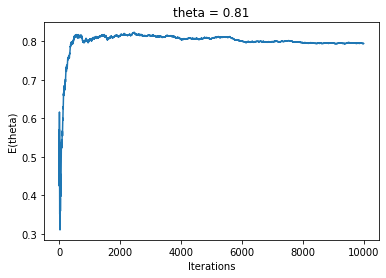

In [28]:
import matplotlib.pyplot as plt
plt.plot(M1)
plt.ylabel("E(theta)")
plt.xlabel("Iterations")
plt.title("theta = 0.81")
plt.show()

In [223]:
M1[-10:]

[0.17976911837114393,
 0.17975869552114068,
 0.1797482742627892,
 0.1797378545956944,
 0.17972743651946144,
 0.1797481631160188,
 0.17973774658192215,
 0.17975846965995274,
 0.17974805466748658,
 0.17976877422822948]